<a href="https://colab.research.google.com/github/AHernandez527/Tarea1_InteligenciaAritificial/blob/main/TareaProgramada1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea Programada 1 - Inteligencia Artificial**

Juan Pablo Jiménez Anderson

Adriana Vanessa Hernández Calderón 

**Punto 1:**
En el caso del conjunto de datos que se obtiene, se tienen puntos que se clasifican 5 posibles escenarios basados en 4 diferentes características de los mismos. La estructura de un único perceptrón es capaz de generar fronteras lineales simples en un conjunto de datos, sin embargo, para un conjunto de datos más complejo es necesaria la intervención de más de un perceptrón e incluso más de una capa de perceptrones para que el resultado sea una clasificación producto de la suma de las clasificaciones individuales de cada perceptrón. 
En el ejemplo a mostrar se tiene la clasificación que puede dar un único perceptrón en un conjunto de datos más simple: 
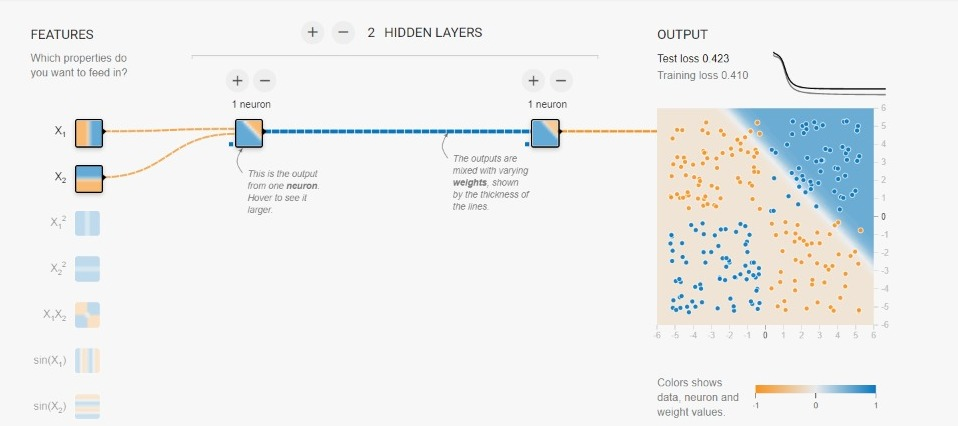

En este caso vemos las limitadas capacidades de un perceptrón, donde no puede generar una frontera suficientemente compleja para datos que se clasifiquen únicamente en dos tipos, por lo tano podemos descartar la posibilidad de que un único perceptrón pueda clasificar datos de una complejidad mayor y aún en más clases distintas. 

**Punto 2**: El punto 2 se resolverá en modo demostrativo dentro del punto 3 para aprovechar la importación de librerías y la parte del código de esta sección, sin embargo, teóricamente podemos decir que esta no puede clasificar conectando la red de perceptrones directo a la salida puesto que esto sería como conectar varios perceptrones individuales, impidiendo así que se elimine la linealidad del sistema, por lo que la salida no podría separar conjuntos de datos que tengan una estructura no separable linealmente, como los que se tienen. 

Punto 3: Implementación de una red neuronal

In [ ]:
!pip install PyDrive                                                            #Librería de manejo de datos en drive 

Autorización y credenciales para acceso de datos de Drive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Descarga del archivo

In [ ]:
downloaded = drive.CreateFile({'id':"17NQ2yLDSFOxLXKqs32_I72Nlsvwn3tmW"})       # Ingresar ID del archivo (se obtiene Javascript en buscador)
downloaded.GetContentFile('sensor_readings_4.csv')                              # Ingresar Nombre del archivo

Bloque de "importación" de librerías:

In [ ]:
import tensorflow as tf                                                         # Se importa tensorflow
from tensorflow import keras                                                    # Se importa keras
import numpy as np                                                              # Se importa NumpPy
from tensorflow.keras import layers                                             # Se importa layers
from tensorflow.keras.layers.experimental import preprocessing                  # Se importa preprocesing
import pandas as pd                                                             # Se importa pandas
import sklearn as sk                                                            # Se importa SciKit learn
from sklearn import preprocessing                                               # Se importa preprocesing de SciKit, contiene otras funciones de utilidad
from sklearn.preprocessing import OneHotEncoder                                 # Se importa OneHotEncoder de SciKit para codificar los labels
from numpy import array                                                         # Se importa array de numpy para manejo de arrays
from numpy import argmax                                                        # Se importa argmax, necesario para LabelEncoder()
from sklearn.preprocessing import LabelEncoder                                  # Se importa Label encoder para codificar los labels
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns        
from keras.callbacks import History   
import matplotlib.pyplot as plt

hisory=History()


Importación y división de los datos del csv.

In [ ]:

sensor_data = pd.read_csv(                                                      # Se lee con pandas un archivo csv, en este caso el archivo de los sensores.
    "/content/sensor_readings_4.csv",
    names=["Sensor_1", "Sensor_2", "Sensor_3", "Sensor_4", "Accion"])           # Se separan cada uno de los datos con un tag.

sensor_features = sensor_data.copy()                                            # Se copia el set de datos para utilizar como features
sensor_labels = sensor_features.pop('Accion')                                   # Al set de features se le extrae "Accion" y se almacena como label

In [ ]:
sensor_data                                                                     # Verificación de los datos contenidos en cada una de las variales
sensor_features
sensor_labels = sensor_labels.drop(index=0)
sensor_features = sensor_features.drop(index=0)
sensor_features['Sensor_1'] = sensor_features['Sensor_1'].astype(float, errors = 'raise')
sensor_features['Sensor_2'] = sensor_features['Sensor_2'].astype(float, errors = 'raise')
sensor_features['Sensor_3'] = sensor_features['Sensor_3'].astype(float, errors = 'raise')
sensor_features['Sensor_4'] = sensor_features['Sensor_4'].astype(float, errors = 'raise')

Codificar los datos de "accion" en valores numéricos usando OneHotEncoder

In [ ]:
sensor_labels_np = sensor_labels.to_numpy()
sensor_features_np = sensor_features.to_numpy()
sensor_labels_np = sensor_labels_np.reshape(5456,1)

label_encoder = OneHotEncoder(sparse = False)
onehot = label_encoder.fit_transform(sensor_labels_np)

Y_values = pd.DataFrame(onehot)
Y_values_np = Y_values.to_numpy()
sensor_features_np
sensor_labels_np
onehot

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

**Demostración del punto 2**
Se creará una ANN que conectará las entradas directamente a la salida y se evaluará si se tiene un resultado exitoso.
Para asegurarse que la falla es por la arquitectura de la red y no por los hiperparámetros se utilizará la estructura del punto 4, en la que se disponía de accuracy de aprox. 94%. 

In [ ]:
model = keras.Sequential()
model.add(Dense(0, input_dim=4,activation='linear'))                            # Definición de capa oculta de 100 neuronas y función de activación lineal                           
model.add(Dense(4, activation = 'sigmoid'))                                     # Definición de capa de salida de neuronas y función de activación sigmoide  

model.compile(loss='mse',                                                       # Compilación del modelo, define el learning rate
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),
              metrics='accuracy')

model9 = model.fit(x = sensor_features_np, y = Y_values_np, epochs=50)          # Corre las iteraciones.

lss, accrcy = model.evaluate(x = sensor_features_np, y = Y_values_np)           # Función para arrojar loss y accuracy
print("loss: ", lss, " accuracy: ", accrcy*100, "%")

Epoch 1/50
171/171 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.4041
Epoch 2/50
171/171 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.4041
Epoch 3/50
171/171 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.4041
Epoch 4/50
171/171 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.4041
Epoch 5/50
171/171 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.4041
Epoch 6/50
171/171 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.4041
Epoch 7/50
171/171 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.4041
Epoch 8/50
171/171 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.4041
Epoch 9/50
171/171 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.4041
Epoch 10/50
171/171 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.4041

Ahora podemos notar como disminuyó a prácticamente 40% el acc y el loss pasó de 0.07 a 0.25. En este caso esta red neuronal no es mínimamente confiable y esto se debe a que por las características de su arquitectura no es capaz de clasificar datos del nivel de complejidad que se le dispusieron. 

**(ANN-1)** Una vez se tienen los datos de entrada y salida, se procede a realizar el modelo de una ANN.
Para este primer modelo, se utilizan 10 neuronas en la capa oculta, y en la capa de salida se utilizan 4 neuronas, con un optimizador Adam y un learning rate de 1 a modo de primera prueba.

In [ ]:
model = keras.Sequential()
model.add(Dense(10, input_dim=4,activation='linear'))                           # Definición de capa oculta de 100 neuronas y función de activación lineal                           
model.add(Dense(4, activation = 'sigmoid'))                                     # Definición de capa de salida de neuronas y función de activación sigmoide  

model.compile(loss='mse',                                                       # Compilación del modelo, define el learning rate
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics='accuracy')

model1 = model.fit(x = sensor_features_np, y = Y_values_np, epochs=100, 
                   validation_split=0.2)                                        # Corre las iteraciones del modelo, separa los datos 80% train, 20% Test

#hist1= model.fit(x = sensor_features_np, y = Y_values_np, epochs=50)


Epoch 1/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1261 - accuracy: 0.6615 - val_loss: 0.1064 - val_accuracy: 0.6932
Epoch 2/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.7537 - val_loss: 0.0983 - val_accuracy: 0.7289
Epoch 3/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.7553 - val_loss: 0.1266 - val_accuracy: 0.6877
Epoch 4/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.7906 - val_loss: 0.1126 - val_accuracy: 0.7335
Epoch 5/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.8247 - val_loss: 0.1132 - val_accuracy: 0.8352
Epoch 6/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.8309 - val_loss: 0.1133 - val_accuracy: 0.8407
Epoch 7/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0906 - accuracy: 0.8456 - val_loss: 0.1100 - val_accuracy: 0.7637

171/171 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.7463
loss:  0.12745845317840576  accuracy:  74.63343143463135 %


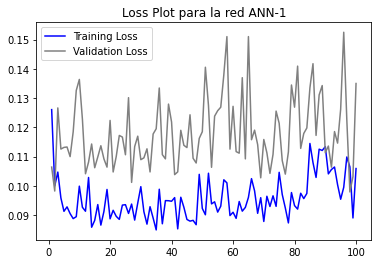

In [ ]:
lss, accrcy = model.evaluate(x = sensor_features_np, y = Y_values_np)           # Función para arrojar loss y accuracy
print("loss: ", lss, " accuracy: ", accrcy*100, "%")

acc = model1.history['accuracy']                                                # Extrae datos de trainingaccuracy del modelo de la red
loss = model1.history['loss']                                                   # Extrae datos de training loss del modelo de la red
val_acc = model1.history['val_accuracy']                                        # Extrae datos de validation accuracy del modelo de la red
val_lss = model1.history['val_loss']                                            # Extrae datos de validation loss del modelo de la red

epochs = range(1, len(acc)+1)                                                   # Define la cantidad de epochs a trabajar mediante un rango

plt.plot(epochs, loss, 'b', label='Training Loss')                              # Plotea el comportamiento del Training Loss con en azul su respectivo label
plt.plot(epochs, val_lss, 'gray', label='Validation Loss')                      # Plotea el comportamiento del Testing Loss con en azul su respectivo label
plt.title('Loss Plot para la red ANN-1')
plt.legend()

plt.show()

**(ANN-2)** Para este segundo modelo, se utilizan 10 neuronas en la capa oculta, y en la capa de salida se utilizan 4 neuronas, con un optimizador distinto: SGD y un learning rate de 1.



In [ ]:
model = keras.Sequential()
model.add(Dense(10, input_dim=4,activation='linear'))                           # Definición de capa oculta de 100 neuronas y función de activación lineal                           
model.add(Dense(4, activation = 'sigmoid'))                                     # Definición de capa de salida de neuronas y función de activación sigmoide  

model.compile(loss='mse',                                                       # Compilación del modelo, define el learning rate
              optimizer=tf.keras.optimizers.Adamax(learning_rate=0.1),
              metrics='accuracy')

model2 = model.fit(x = sensor_features_np, y = Y_values_np, epochs=100,
                   validation_split=0.2)                                        # Corre las iteraciones del modelo, separa los datos 80% train, 20% Test


Epoch 1/100
137/137 [==============================] - 1s 3ms/step - loss: 0.1181 - accuracy: 0.6652 - val_loss: 0.1068 - val_accuracy: 0.6749
Epoch 2/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.7475 - val_loss: 0.1019 - val_accuracy: 0.7115
Epoch 3/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.8103 - val_loss: 0.0814 - val_accuracy: 0.8571
Epoch 4/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.8549 - val_loss: 0.0776 - val_accuracy: 0.8993
Epoch 5/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.8737 - val_loss: 0.0804 - val_accuracy: 0.8333
Epoch 6/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.8772 - val_loss: 0.0837 - val_accuracy: 0.7720
Epoch 7/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.8735 - val_loss: 0.0752 - val_accuracy: 0.8462

171/171 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9049
loss:  0.06885282695293427  accuracy:  90.48753380775452 %


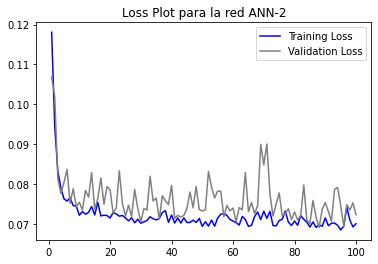

In [ ]:
lss, accrcy = model.evaluate(x = sensor_features_np, y = Y_values_np)           # Función para arrojar loss y accuracy
print("loss: ", lss, " accuracy: ", accrcy*100, "%")
acc = model2.history['accuracy']
loss = model2.history['loss']
val_acc = model2.history['val_accuracy']
val_lss = model2.history['val_loss']   

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_lss, 'gray', label='Validation Loss') 
plt.title('Loss Plot para la red ANN-2')
plt.legend()

plt.show()

Los resultados en ambos casos fueron bastante similares, esto puede deberse a que se trabajó con los mismos hiperparámetros a pesar de haber realizado un cambio en el optimizador, ya que en ambos casos se le dejó el mismo learning rate, sin embargo los resultados no dan un porcentaje de accuracy óptimo. 

**Punto 4 (ANN-3):** Se hace un código con los hiperparámetros que mejores resultados arrojan, a continuación se menciona el efecto de cada uno de los hiperparámetros:

*   *Número de neuronas:* El número de neuronas mejora la capacidad de clasificación de patrones más complejos de datos, en este caso tenemos datos que dependen de 4 diferentes valores, por lo que dados los primeros intentos se decide aumentar gradualmente la cantidad de neuronas hasta 100 que se dió el mejor rendimiento. 
*   *Tasa de aprendizaje:* La tasa de aprendizaje modifica qué tan meticulosa es la búsqueda del "punto más bajo", en las primeras pruebas se vió un loss bastante alto y un bajo porentaje de accuracy, por lo que se decidió modificar este valor primero a 0.1 y luego a 0.01 notando una amplia mejora al reducir el valor y obteniendo el mejor porcentaje en 0.01.
*   *Número de iteraciones:* El número de iteraciones ayuda a modificar qué tanto aprende la red, es decir, qué tantos intentos de "práctica" se le dan, en los dos primeros escenarios se probó con 100 iteraciones, sin embargo se ve que a parte de sierto punto no mejora los valores de loss ni los de accuracy, por lo que reduciendolo gradualmente se encontró un valor óptimo en 50.
*   *Mecanismos de optimización:* En cuanto a los mecanismos de optimización, cada uno varía el algoritmo que se utiliza para encontrar la menor pérdida posible, por lo que lo que se procedió fue probar cada uno con la nueva tasa de aprendizaje hasta encontrar el que diera los mejores valores, siendo Nadam (Adam + Nesterov Momentum) el que presentó resultados más idóneos.



Epoch 1/50
137/137 [==============================] - 1s 3ms/step - loss: 0.1194 - accuracy: 0.6627 - val_loss: 0.1166 - val_accuracy: 0.6923
Epoch 2/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 0.7832 - val_loss: 0.0864 - val_accuracy: 0.7720
Epoch 3/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.8268 - val_loss: 0.0861 - val_accuracy: 0.8361
Epoch 4/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.8472 - val_loss: 0.0805 - val_accuracy: 0.8150
Epoch 5/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.8694 - val_loss: 0.0880 - val_accuracy: 0.8434
Epoch 6/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0760 - accuracy: 0.8728 - val_loss: 0.0777 - val_accuracy: 0.8782
Epoch 7/50
137/137 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.8808 - val_loss: 0.1010 - val_accuracy: 0.8086
Epoch 

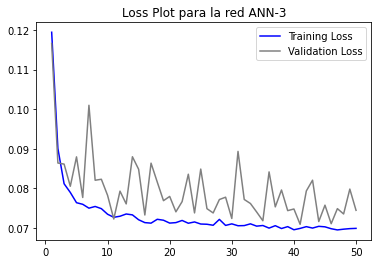

In [ ]:
model = keras.Sequential()
model.add(Dense(100, input_dim=4,activation='linear'))                          # Definición de capa oculta de 100 neuronas y función de activación lineal                           
model.add(Dense(4, activation = 'sigmoid'))                                     # Definición de capa de salida de neuronas y función de activación sigmoide  

model.compile(loss='mse',                                                       # Compilación del modelo, define el learning rate
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),
              metrics='accuracy')

model3 = model.fit(x = sensor_features_np, y = Y_values_np, epochs=50, 
                   validation_split=0.2)                                        # Corre las iteraciones del modelo, separa los datos 80% train, 20% Test

lss, accrcy = model.evaluate(x = sensor_features_np, y = Y_values_np)           # Función para arrojar loss y accuracy
print("loss: ", lss, " accuracy: ", accrcy*100, "%")

acc = model3.history['accuracy']
loss = model3.history['loss']
val_acc = model3.history['val_accuracy']
val_lss = model3.history['val_loss']   

epochs = range(1, len(acc)+1)


plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_lss, 'gray', label='Validation Loss') 
plt.title('Loss Plot para la red ANN-3')
plt.legend()

plt.show()


**Punto 6:** Representación gráfica de loss y accuracy para las redes neuronales antes tratadas (según lo solicitado en consulta)

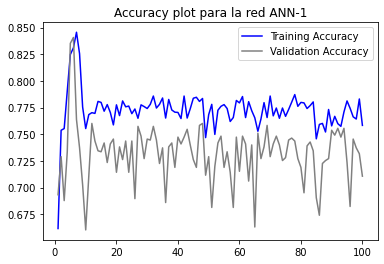

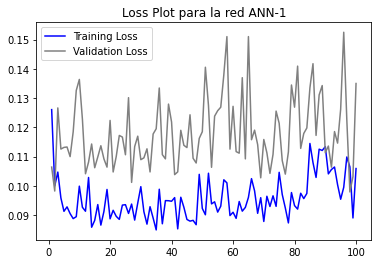

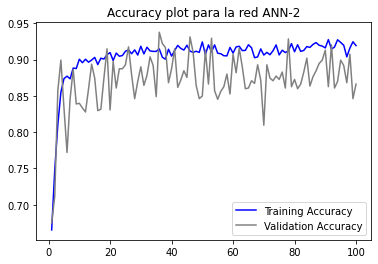

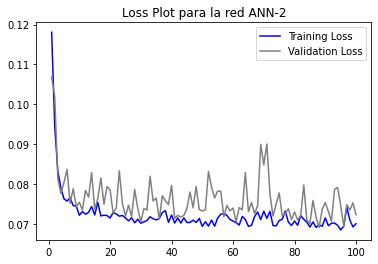

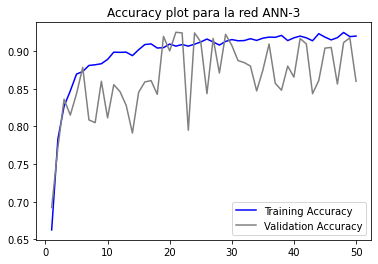

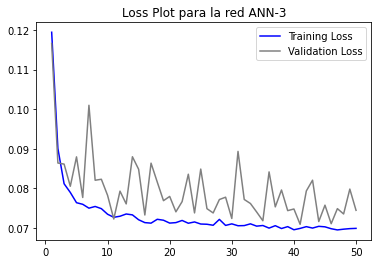

In [ ]:
###Plot ANN-1###
acc = model1.history['accuracy']                                                # Extrae datos de trainingaccuracy del modelo de la red
loss = model1.history['loss']                                                   # Extrae datos de training loss del modelo de la red
val_acc = model1.history['val_accuracy']                                        # Extrae datos de validation accuracy del modelo de la red
val_lss = model1.history['val_loss']                                            # Extrae datos de validation loss del modelo de la red

epochs = range(1, len(acc)+1)                                                   # Define la cantidad de epochs a trabajar mediante un rango

plt.plot(epochs, acc, 'b', label='Training Accuracy')                           # Plotea el comportamiento del training accuracy en azul con su respectivo label
plt.plot(epochs, val_acc, 'gray', label='Validation Accuracy')                  # Plotea el comportamiento del testing accuracy en gris con su respectivo label
plt.title('Accuracy plot para la red ANN-1')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')                              # Plotea el comportamiento del Training Loss con en azul su respectivo label
plt.plot(epochs, val_lss, 'gray', label='Validation Loss')                      # Plotea el comportamiento del Testing Loss con en azul su respectivo label
plt.title('Loss Plot para la red ANN-1')
plt.legend()

plt.show()

###Plot ANN-2###
acc = model2.history['accuracy']
loss = model2.history['loss']
val_acc = model2.history['val_accuracy']
val_lss = model2.history['val_loss']   

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'gray', label='Validation Accuracy')
plt.title('Accuracy plot para la red ANN-2')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_lss, 'gray', label='Validation Loss') 
plt.title('Loss Plot para la red ANN-2')
plt.legend()

plt.show()

###Plot ANN-3###
acc = model3.history['accuracy']
loss = model3.history['loss']
val_acc = model3.history['val_accuracy']
val_lss = model3.history['val_loss']   

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'gray', label='Validation Accuracy')
plt.title('Accuracy plot para la red ANN-3')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_lss, 'gray', label='Validation Loss') 
plt.title('Loss Plot para la red ANN-3')
plt.legend()

plt.show()

A continuación también se definen las fronteras de separación depara las ANN, en esta sección de código se importa un nuevo set de datos, el de 2 sensores virtuales, además se codifica con el OneHotEncoder nuevamente y se crea una red neuronal


**Punto 7**

In [ ]:
downloaded = drive.CreateFile({'id':"1Ceq4_qARfQhWQUZjtprclKLGDwLnLK54"})       # Ingresar ID del archivo (se obtiene Javascript en buscador)
downloaded.GetContentFile('Sensor_Ruido_Subir.csv')    

In [ ]:
sensor_data1 = pd.read_csv(                                                      # Se lee con pandas un archivo csv, en este caso el archivo de los sensores.
    "/content/Sensor_Ruido_Subir.csv",
    names=["Sensor_1", "Sensor_2", "Sensor_3", "Sensor_4", "Accion"])           # Se separan cada uno de los datos con un tag.

sensor_features1 = sensor_data1.copy()                                            # Se copia el set de datos para utilizar como features
sensor_labels1 = sensor_features1.pop('Accion')  

sensor_labels1 = sensor_labels1.drop(index=0)
sensor_features1 = sensor_features1.drop(index=0)
sensor_features1['Sensor_1'] = sensor_features1['Sensor_1'].astype(float, errors = 'raise')
sensor_features1['Sensor_2'] = sensor_features1['Sensor_2'].astype(float, errors = 'raise')
sensor_features1['Sensor_3'] = sensor_features1['Sensor_3'].astype(float, errors = 'raise')
sensor_features1['Sensor_4'] = sensor_features1['Sensor_4'].astype(float, errors = 'raise')

sensor_data1                                                                     # Verificación de los datos contenidos en cada una de las variales
sensor_features1


,Sensor_1,Sensor_2,Sensor_3,Sensor_4
1,1.75448,0.47594,2.47192,0.44616
2,1.73761,0.47145,2.42736,0.45474
3,1.77135,0.47145,2.47404,0.45474
4,1.75448,0.46247,2.42736,0.45045
5,1.78716,0.46384,2.40402,0.44720
...,...,...,...,...
5451,1.07520,0.67671,1.15222,1.64010
5452,0.92082,0.66847,1.13526,1.15010
5453,0.90792,0.66126,1.10565,1.13815
5454,0.99601,0.67310,1.08570,1.17390


In [ ]:
sensor_labels_np1 = sensor_labels1.to_numpy()
sensor_features_np1 = sensor_features1.to_numpy()
sensor_labels_np1 = sensor_labels_np1.reshape(5455,1)

label_encoder1 = OneHotEncoder(sparse = False)
onehot = label_encoder1.fit_transform(sensor_labels_np1)

Y_values1 = pd.DataFrame(onehot)
Y_values_np1 = Y_values1.to_numpy()
sensor_features_np1
sensor_labels_np1
onehot

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

Epoch 1/50
137/137 [==============================] - 1s 3ms/step - loss: 0.1197 - accuracy: 0.6554 - val_loss: 0.0977 - val_accuracy: 0.7204
Epoch 2/50
137/137 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 0.7796 - val_loss: 0.0875 - val_accuracy: 0.8038
Epoch 3/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0819 - accuracy: 0.8281 - val_loss: 0.0988 - val_accuracy: 0.7874
Epoch 4/50
137/137 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.8440 - val_loss: 0.0943 - val_accuracy: 0.7479
Epoch 5/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.8614 - val_loss: 0.0769 - val_accuracy: 0.8359
Epoch 6/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.8705 - val_loss: 0.0783 - val_accuracy: 0.8643
Epoch 7/50
137/137 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.8767 - val_loss: 0.0778 - val_accuracy: 0.8561
Epoch 

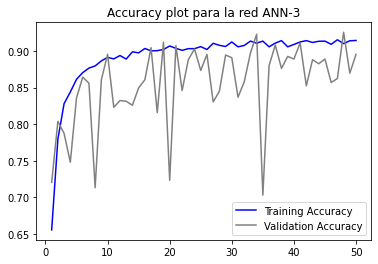

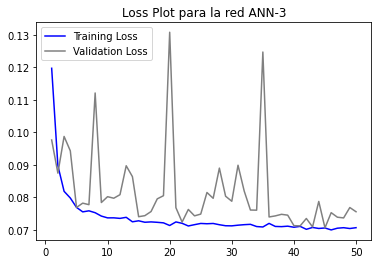

In [ ]:
model = keras.Sequential()
model.add(Dense(100, input_dim=4,activation='linear'))                          # Definición de capa oculta de 100 neuronas y función de activación lineal                           
model.add(Dense(4, activation = 'sigmoid'))                                     # Definición de capa de salida de neuronas y función de activación sigmoide  

model.compile(loss='mse',                                                       # Compilación del modelo, define el learning rate
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),
              metrics='accuracy')

modelN = model.fit(x = sensor_features_np1, y = Y_values_np1, epochs=50, 
                   validation_split=0.2)                                        # Corre las iteraciones del modelo, separa los datos 80% train, 20% Test

lss, accrcy = model.evaluate(x = sensor_features_np1, y = Y_values_np1)           # Función para arrojar loss y accuracy
print("loss: ", lss, " accuracy: ", accrcy*100, "%")

acc = modelN.history['accuracy']
loss = modelN.history['loss']
val_acc = modelN.history['val_accuracy']
val_lss = modelN.history['val_loss']   

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'gray', label='Validation Accuracy')
plt.title('Accuracy plot para la red ANN-3')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_lss, 'gray', label='Validation Loss') 
plt.title('Loss Plot para la red ANN-3')
plt.legend()

plt.show()

Como puede observarse esta red neuronal si bien obtiene resultados bastante buenos en la parte de testing, la parte de validation es bastante dificiente y mantiene resultados mucho menos precisos. Es por esto que podemos concluir que aunque se mantengan las características idóneas en la red para este conjunto de datos, el ruido dificulta el aprendizaje de la misma y no permite tener una clasificación confiable en ella. En comparación con los demás gráficos, sobretodo con el gráfico obtenido con los valores más idóneos y el accuracy más elevado se tienen variaciones en el validation loss más bruscas y además de esto más una red menos confiable en cuando a la clasificación. 